<a href="https://colab.research.google.com/github/Hoangthang017/nine-dash-line-detection/blob/main/Yolo/yolov4_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# mount drive and import

# Mục mới

In [ ]:
# Step 1. Mount drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import time
from google.colab.patches import cv2_imshow

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
import random
import pprint
import sys
import time
import numpy as np
from optparse import OptionParser
import pickle
import math
import cv2
import copy
from matplotlib import pyplot as plt
import tensorflow as tf
import pandas as pd
import os
import albumentations as A
from sklearn.metrics import average_precision_score

from keras import backend as K
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D, Dropout
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, TimeDistributed
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.losses import categorical_crossentropy

from keras.models import Model
from keras.utils import generic_utils
from tensorflow.keras.layers import Layer, InputSpec
from keras import initializers, regularizers

# Train

In [ ]:
def get_output_layers(net):                     #Hàm đọc tên các nhãn.
    layer_names = net.getLayerNames()

    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    return output_layers
def draw_prediction(img, class_id, confidence, x, y, x_plus_w, y_plus_h): #Hàm vẽ bounding box lên các ảnh
    label = str(classes[class_id])

    color = COLORS[class_id]

    cv2.rectangle(img, (x, y), (x_plus_w, y_plus_h), color, 2)

    cv2.putText(img, label + str(confidence) , (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

def drawBox(image, points):                    #Hàm vẽ các bounding box.
    height, width = image.shape[:2]
    xi,yi, wi, hi = points
    cv2.rectangle(image, (xi, yi), (xi + wi, yi + hi), (255,255,0), 1)
    cv2_imshow(image)
def savePredict(pathSave, name, text):          #Hàm lưu các file txt có format: label 0.xxxx 0.yyyy 0.wwww 0.hhhhh
    textName = pathSave + '/' + name + '.txt'
    with open(textName, 'w+') as groundTruth:
        groundTruth.write(text)
        groundTruth.close()

In [ ]:
pathImg= r"/content/drive/MyDrive/Calc MAP/mAP/input/images-optional"
#Đia chỉ để các file ảnh để model dự đoán đối tượng
pathDirection = r"/content/drive/MyDrive/darknet/Prediction/predicted"
#Địa chỉ để xuất output dự đoán của model
print("start")
for img in glob.glob(pathImg + '/*.jpg'): # load lần lượt các ảnh trong folder để detect
    name = img.split(pathImg)[-1].split('.')[0]
    print(img)
    image = cv2.imread(img)
    #Đọc ảnh
    Width = image.shape[1]
    Height = image.shape[0]
    scale = 0.00392
    #Đoc chiều dài và rộng của ảnh

    classes = None
    with open("/content/drive/MyDrive/darknet/Prediction/yolo.names", 'r') as f: # Thay đổi địa chỉ của fiell yolo.names tại đây
        classes = [line.strip() for line in f.readlines()]

    COLORS = np.random.uniform(0, 255, size=(len(classes), 3))
    #Random màu để vẽ bounding box
    net = cv2.dnn.readNet("/content/drive/MyDrive/darknet/Prediction/yolov4-custom_best.weights", "/content/drive/MyDrive/darknet/Prediction/yolov4-custom.cfg") #Thay đổi tên và địa chỉ file weight và file cfg tại đây
    blob = cv2.dnn.blobFromImage(image, scale, (416, 416), (0, 0, 0), True, crop=False)
    #cvt ảnh sang dạng blob
    net.setInput(blob)

    outs = net.forward(get_output_layers(net))
    #print(outs)
    class_ids = []
    confidences = []
    boxes = []
    conf_threshold = 0.5 # Ngưỡng detect. Nếu xác suất đối tượng >0.5 thì nó mới được xem là một đối tượng đúng
    # Giảm nếu model không cần độ chính xác cao, tăng nếu model cần độ chính xác cao
    nms_threshold = 0.4
    
    #start = time.time()
    for out in outs: #Xuất các đối tượng được predict
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > conf_threshold:
                #print(confidence)
                center_x = int(detection[0] * Width)
                center_y = int(detection[1] * Height)
                w = int(detection[2] * Width)
                h = int(detection[3] * Height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                #print(w,h,x,y)
                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([x, y, w, h])

    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

    print(indices)
    
    #lưu file txt
    Result = ""
    for i in indices:
        i = i[0]
        box = boxes[i]
        x = box[0]
        y = box[1]
        w = box[2]
        h = box[3]
        textpredict = "{} {} {} {} {} {}\n".format(str(class_ids[i]), confidences[i], x, y, x+w, y+h)
        Result += textpredict
        print(box)
        drawBox(image,box)
    savePredict(pathDirection, name, Result)
    


# test 1 image

In [ ]:
image_path = "/content/image_2021-12-22_180206.png"

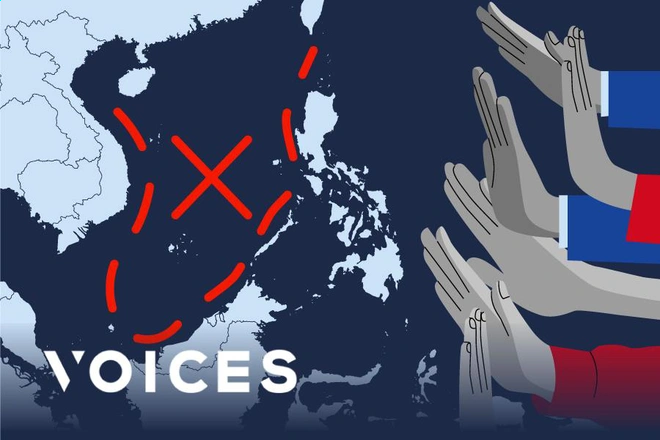

In [ ]:
image = cv2.imread(image_path)
#Đọc ảnh
Width = image.shape[1]
Height = image.shape[0]
scale = 0.00392

classes = None
with open("/content/gdrive/MyDrive/darknet/Prediction/yolo.names", 'r') as f: # Thay đổi địa chỉ của fiell yolo.names tại đây
  classes = [line.strip() for line in f.readlines()]

COLORS = np.random.uniform(0, 255, size=(len(classes), 3))
#Random màu để vẽ bounding box
net = cv2.dnn.readNet("/content/gdrive/MyDrive/darknet/Prediction/yolov4-custom_best.weights", "/content/gdrive/MyDrive/darknet/Prediction/yolov4-custom.cfg") #Thay đổi tên và địa chỉ file weight và file cfg tại đây
blob = cv2.dnn.blobFromImage(image, scale, (416, 416), (0, 0, 0), True, crop=False)
#cvt ảnh sang dạng blob
net.setInput(blob)

outs = net.forward(get_output_layers(net))
#print(outs)
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5 # Ngưỡng detect. Nếu xác suất đối tượng >0.5 thì nó mới được xem là một đối tượng đúng
# Giảm nếu model không cần độ chính xác cao, tăng nếu model cần độ chính xác cao
nms_threshold = 0.4
#start = time.time()

# lấy các bboxes
for out in outs: #Xuất các đối tượng được predict
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > conf_threshold:
            #print(confidence)
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            #print(w,h,x,y)
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
if (len(boxes) == 0):
   drawBox(image,[0,0,0,0])
for i in indices:
  i = i[0]
  print(boxes[i])
  x,y,w,i = boxes[i]
  cv2.rectangle(image, (x, y), (x + w, y + h), (255,0,0), 1)
  cv2_imshow(image)

In [ ]:
!pip install opencv-contrib-python==3.4.13.47 --force-reinstall

     |████████████████████████████████| 53.7 MB 206 kB/s 
     |████████████████████████████████| 15.7 MB 42.9 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


# calc map

In [ ]:
%cd /content/drive/MyDrive/Calc MAP
!git clone https://github.com/Cartucho/mAP.git

[Errno 2] No such file or directory: '/content/drive/MyDrive/Calc MAP'
/content
Cloning into 'mAP'...
remote: Enumerating objects: 908, done.
remote: Total 908 (delta 0), reused 0 (delta 0), pack-reused 908
Receiving objects: 100% (908/908), 14.71 MiB | 22.69 MiB/s, done.
Resolving deltas: 100% (321/321), done.


In [ ]:
import glob, os
rootPath = "/content/drive/MyDrive/Calc_MAP/mAP/input/detection-results"
os.chdir(rootPath)
for file in glob.glob("*.txt"):
  f = open(rootPath +"/"+ file, "r")
  while(1):
    content = f.readline().split(" ")
    if(content[0] == ""):
      break
    result = content[0] +' ' +  ' '.join(content[2:])
    fileWrite = open(rootPath +"-1/"+ file, "w")
    fileWrite.write(result)


In [ ]:
import glob, os
rootPath = "/content/drive/MyDrive/Calc_MAP/mAP/input/ground-truth"
os.chdir(rootPath)
for file in glob.glob("*.txt"):
  f = open(rootPath +"/"+ file, "r")
  while(1):
    content = f.readline().split(" ")
    if(content[0] == ""):
      break
    result = content[0] +' ' +  ' '.join(content[2:])
    fileWrite = open(rootPath +"-1/"+ file, "w")
    fileWrite.write(result)
